Yichuan Philip Ma

CS506 Project

BPDA Brazilian Census Team 2

Visualizations for Brazilians in Massachusetts and the US by Citizenship

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data

In [2]:
import os

directory = 'Citizenship'
if not os.path.exists(directory):
    os.makedirs(directory)

MA state code is 25.

Citizenship data is in rows 25-26 for each year.

In [3]:
start = 25
end = 26
cship = extract_data(start, end)
cship.to_csv(f"{directory}/Citizenship 2012-2019.csv")

In [9]:
cship_MA_all = []
cship_national_all = []
years = list(range(2012, 2019+1))
labels = ['U.S. citizen by naturalization', 'Not a citizen of the U.S.']
for year in years:
    cship_year = cship[cship['Year'] == year]
    cship_MA_year = [year]
    cship_national_year = [year]
    for i in range(end - start + 1):
        cship_MA_year.append(cship_year[25].iloc[i])
        cship_national_year.append(sum(cship_year.iloc[i,3:]))
    cship_MA_all.append(cship_MA_year)
    cship_national_all.append(cship_national_year)

The following stacked bar chart shows the change in the share of Brazilians in Massachusetts that are/aren't naturalized US citizens between 2012-2019.

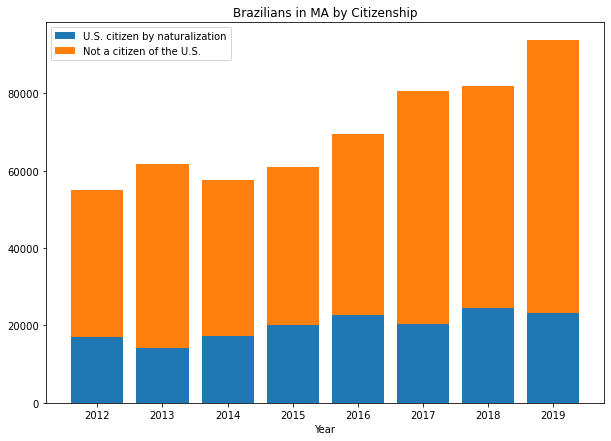

In [10]:
cship_MA_all = np.array(cship_MA_all)
fig, ax = plt.subplots(figsize = (10, 7))
bottom = np.zeros(len(years))
for i in range(end - start + 1):
    values = cship_MA_all[:,i+1]
    ax.bar(years, values, label=labels[i], bottom=bottom)
    bottom += values
ax.set_xlabel('Year')
ax.set_title('Brazilians in MA by Citizenship')
ax.legend()
plt.savefig(f"{directory}/BR_Cship_Mass_since2012.png")
plt.show()

The following stacked bar chart shows the change in the share of Brazilians nationwide that are/aren't naturalized US citizens between 2012-2019.

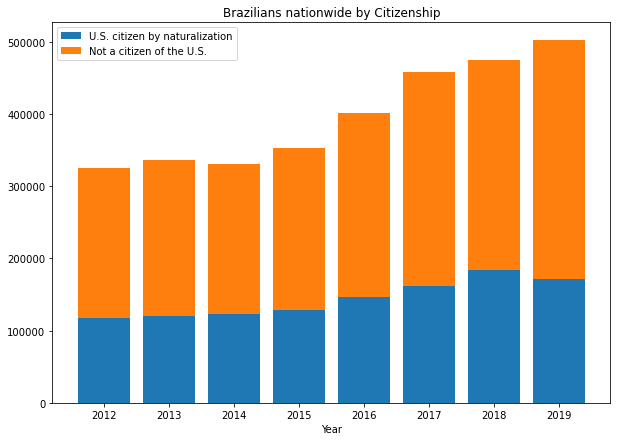

In [11]:
cship_national_all = np.array(cship_national_all)
fig, ax = plt.subplots(figsize = (10, 7))
bottom = np.zeros(len(years))
for i in range(end - start + 1):
    values = cship_national_all[:,i+1]
    ax.bar(years, values, label=labels[i], bottom=bottom)
    bottom += values
ax.set_xlabel('Year')
ax.set_title('Brazilians nationwide by Citizenship')
ax.legend()
plt.savefig(f"{directory}/BR_Cship_national_since2012.png")
plt.show()